In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt

import utils as utl

# Load Raw Data

In [2]:
# load HDF file
dfs = pd.read_hdf('./data/Ballsystem_LegKinematics_DataStructures/P9_BPN/alldata_V3.h5')

# centers of the ball for each df in dfs
l_ball_c = [
    np.array([]),
    np.array([-5.75194107e-02, 4.08134419e+00, 9.06406343e+01]), # P9RT
    np.array([-3.60054343e-02, 3.83575489e+00, 9.06335406e+01]), # P9LT
]

In [3]:
# select one dataset
neuron = 2 # 0: BPN, 1: P9 right, 2: P9 left

df = dfs.loc[neuron, 'flydata']
ball_c = l_ball_c[neuron]

# some sets of columns
c_xyz = [c for c in df.columns if c[-2:] in ['_x', '_y', '_z']]
c_tag = [ c for c in c_xyz if 'TaG_' in c ]
c_ball = [ 'x_vel', 'y_vel', 'z_vel' ]

leg2step = {
    'R-F': 'R1',
    'R-M': 'R2', 
    'R-H': 'R3',
    'L-F': 'L1',
    'L-M': 'L2', 
    'L-H': 'L3',}

leg2step = {
    'R-F': 'L1',
    'R-M': 'L2', 
    'R-H': 'L3',
    'L-F': 'R1',
    'L-M': 'R2', 
    'L-H': 'R3',}

df_raw = df
df_raw

df_d = utl.dist_from_center(df_raw, ball_c)
df_d

,R-F-ThC,R-F-CTr,R-F-FeTi,R-F-TiTa,R-F-TaG,R-M-ThC,R-M-CTr,R-M-FeTi,R-M-TiTa,R-M-TaG,...,L-M-TiTa,L-M-TaG,L-H-ThC,L-H-CTr,L-H-FeTi,L-H-TiTa,L-H-TaG,R-WH,L-WH,Notum
0,3.965913,3.576917,3.670782,3.310047,3.172879,3.961904,3.680057,4.200218,3.603821,3.195768,...,3.531135,3.195794,3.937825,3.686945,3.955050,3.409948,3.074052,4.390380,4.307938,4.561256
1,3.965421,3.577746,3.669355,3.311197,3.172955,3.961699,3.679017,4.195179,3.600199,3.192542,...,3.525523,3.193585,3.938889,3.686697,3.947860,3.413078,3.101711,4.390319,4.307106,4.561292
2,3.964463,3.577956,3.672917,3.315296,3.175104,3.961580,3.676796,4.187447,3.594431,3.184683,...,3.521685,3.190409,3.938294,3.686644,3.940187,3.413263,3.132849,4.390082,4.306417,4.561357
3,3.962949,3.576865,3.680308,3.321437,3.177386,3.961589,3.673324,4.178330,3.587614,3.174270,...,3.519205,3.186580,3.937253,3.686318,3.933072,3.412559,3.153167,4.389991,4.305901,4.561418
4,3.960780,3.574039,3.685465,3.324641,3.174377,3.961836,3.669137,4.169829,3.581057,3.166793,...,3.516210,3.179412,3.936368,3.685719,3.928632,3.411495,3.161482,4.390213,4.305536,4.561443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181995,4.051750,3.636974,3.698099,3.308492,3.129718,4.064306,3.849646,4.014475,3.448604,3.173248,...,3.452501,3.105763,4.045745,3.749044,4.098416,3.479263,3.111605,4.453623,4.443450,4.686983
181996,4.052473,3.638147,3.706671,3.312915,3.129781,4.064241,3.843348,4.010901,3.446050,3.170216,...,3.455317,3.108408,4.045764,3.749868,4.108531,3.487485,3.115348,4.453604,4.443522,4.686991
181997,4.053297,3.639501,3.713703,3.318200,3.130196,4.064140,3.835858,4.007669,3.444119,3.167981,...,3.458222,3.111265,4.045815,3.750709,4.120301,3.497420,3.116031,4.453597,4.443563,4.686998
181998,4.054157,3.640933,3.719986,3.325286,3.130663,4.064225,3.835857,4.005884,3.443379,3.167245,...,3.460491,3.113427,4.045888,3.751360,4.130183,3.505370,3.113335,4.453700,4.443602,4.687003


# Plot stepcycles

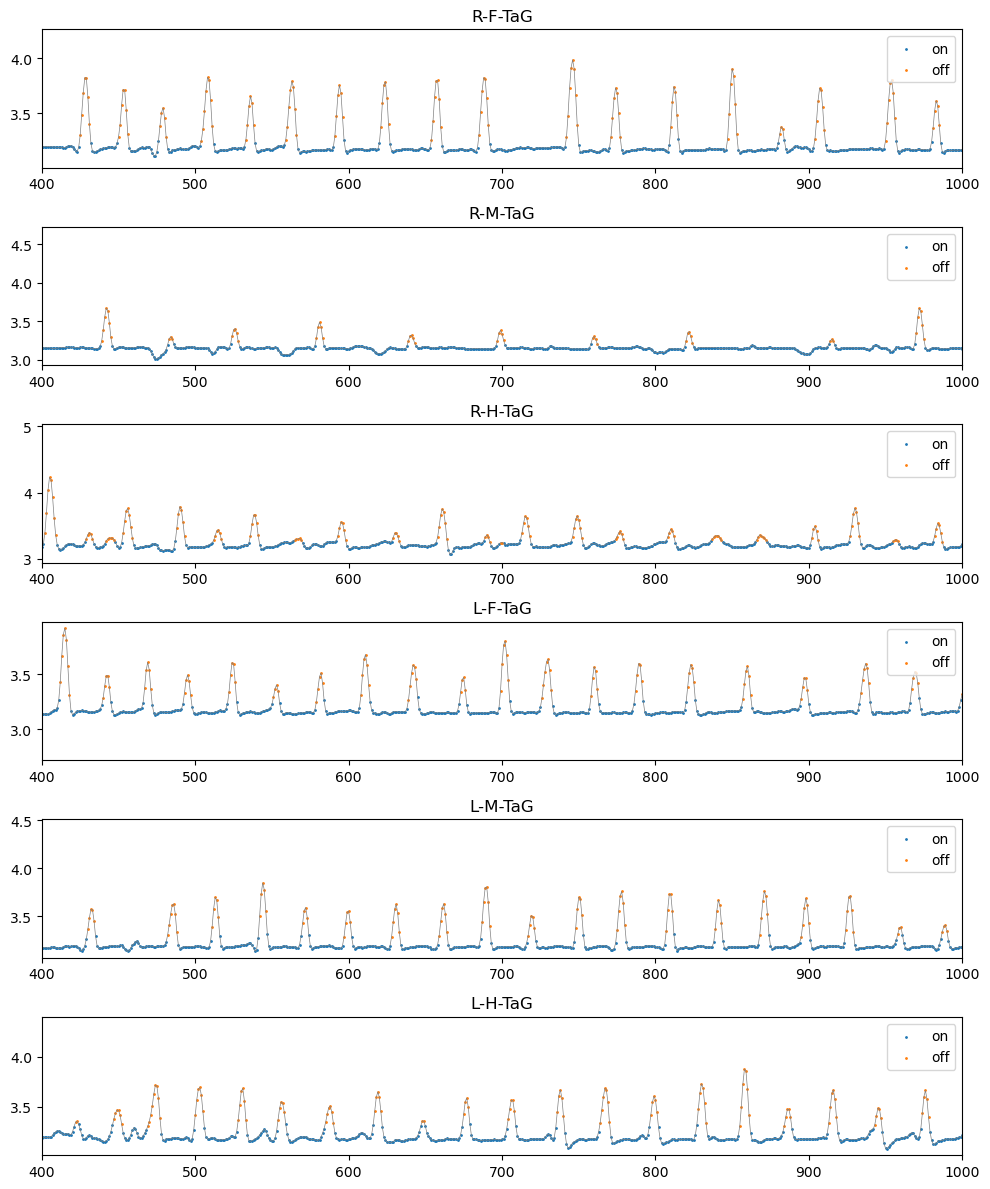

In [4]:
def plot_tag(df_raw, df_d, flynum, tnum, xlim=(None, None), ylim=(None, None), frames=(None, None), close_fig=False, path=''):

    df1 = df_raw.groupby('flynum').get_group(flynum)
    df1 = df1.groupby('tnum').get_group(tnum) # comment this line to look at all trials
    df2 = df_d.loc[df1.index, :]

    cols = [ c for c in df2.columns if 'TaG' in c ]

    n = len(cols)
    fig, axarr = plt.subplots(nrows=n, figsize=(10, 2*n))
    first_frame, last_frame = frames

    for c, ax in zip(cols, axarr):

        r = df2.loc[first_frame:last_frame, c]
        ax.plot(r, lw=0.5, c='gray')

        c_on = '{}_stepcycle'.format(leg2step[c[:3]])
        f_on = df1.loc[first_frame:last_frame, c_on]

        x = r.loc[f_on]
        ax.scatter(x.index, x.values, s=1, label='on')

        x = r.loc[~f_on]
        ax.scatter(x.index, x.values, s=1, label='off')

        ax.legend(loc='upper right')
        ax.set_title(c)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)


    fig.tight_layout()

    if path:
        fig.savefig(path)

    if close_fig:
        plt.close(fig)


flynum, tnum = 1, 1
plot_tag(df_raw, df_d, flynum, tnum, xlim=(400, 1000))

# create GIF

In [ ]:
import imageio.v2 as imageio
from pathlib import Path

def write_gif(inps, out, fps=30, force_overwrite=False, delete_inp=True):
    '''Generate GIF from list of files

    Parameters
    ----------
    inps : list
        Files to be concatenated in GIF
    out : path-like
        Name of the output file, has to have .gif suffix
    fps : int, optional
        Frames per second in GIF, by default 2
    force_overwrite : bool, optional
        If True, overwrite output file, by default False
    delete_inp : bool, optional
        If False, keep input files, by default True
    '''

    out = Path(out)
    if out.is_file() and not force_overwrite:
        print('WARNING: exiting because file {} already exists and force_overwrite is {}'.format(out, force_overwrite))
        return

    with imageio.get_writer(out, mode='I', fps=fps) as writer:
        for inp in inps:
            inp = Path(inp)
            img = imageio.imread(inp)
            writer.append_data(img)
            if delete_inp:
                inp.unlink(missing_ok=True)


l_png = []
for f in np.arange(400, 1000):
    png = 'frame{}.png'.format(f)
    plot_tag(df_raw, df_d, flynum, tnum, xlim=(400, 1000), ylim=(3, 4.2), frames=(400, f), path=png, close_fig=True)
    l_png.append(png)

write_gif(l_png, 'combined.gif', force_overwrite=True)